# Pymaceuticals Inc.
---

### Analysis

- This study was performed on 248 mice within a 45 day trial period and the results show that 2 drugs were significantly more effective than the other 8. Capomulin and Ramicane proved to be the two best treatments for the mice during this trial. The positive correlation between mouse weight and the average tumor volume is 0.84. This is considered a very strong positive correlation, pointing out that on average - the greater the weight of the mouse, the larger the tumor volume. The regression analysis further indicates that at 0.71 (or 71%), the models provided based on the data from the trial have smaller differences between the observed data and the fitted value; as the higher the R-squared value, the closer the models are to the mean. The population of the mice in this trial was made up of 51% male and 49% female in gender, with no evidence of gender playing a factor on the outcome of the trial.


In [182]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [127]:
# Merge the first two datasets into a single dataset
Combined_data = pd.merge(mouse_metadata, study_results, how='outer')

In [128]:
# Display data table for preview

Combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [129]:
# Checking the number of mice.
mice=Combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [130]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()

In [131]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [132]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df=Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [133]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df['Mouse ID'].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [134]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median

regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance

regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [135]:
# Assemble the resulting series into a single summary DataFrame.

summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Variance": regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_stats_table
summary_stats_table.to_csv("fileOne.csv", index=False, header=True)

In [136]:
# Using the aggregation method, produce the same summary statistics in a single line.

single_group_by = clean_df.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

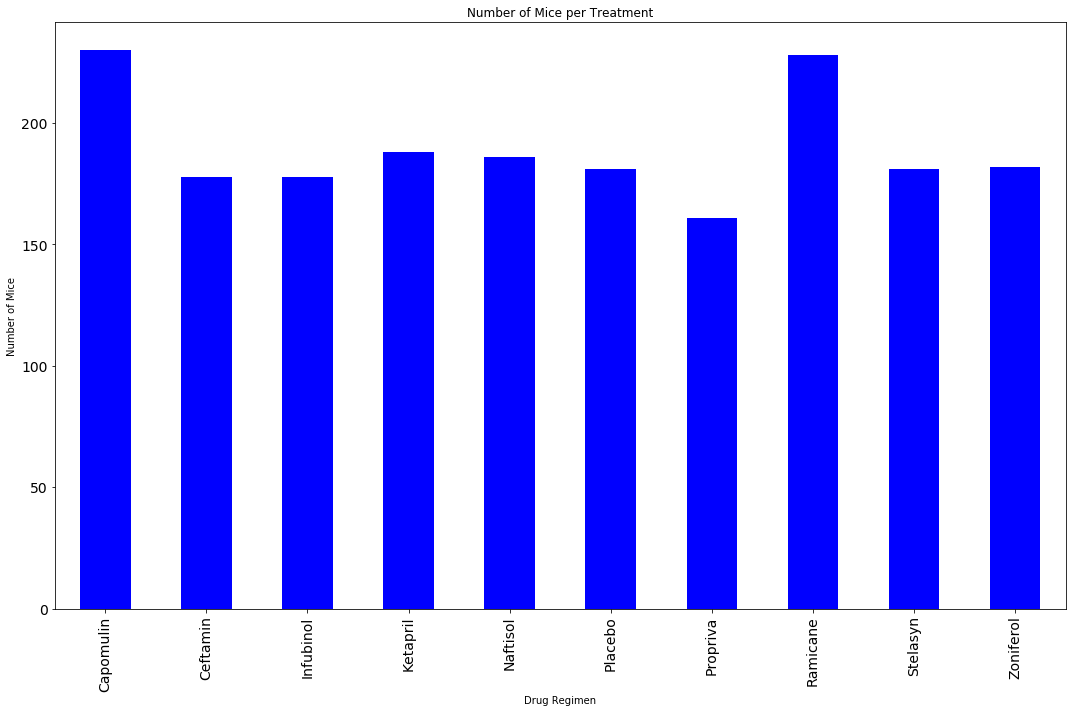

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [150]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

count_mice_per_tret = Combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = count_mice_per_tret.plot.bar(figsize = (15,10), color = 'b', fontsize = 14)
count_mice_per_tret
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

plt.savefig("../../Images/Pandas_mice_per_treat.png")
plt.tight_layout()
plt.show()

count_mice_per_tret

In [145]:
# Create an array for PyPlot that contains the number of mice for each drug regimen

mice_list=(Combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

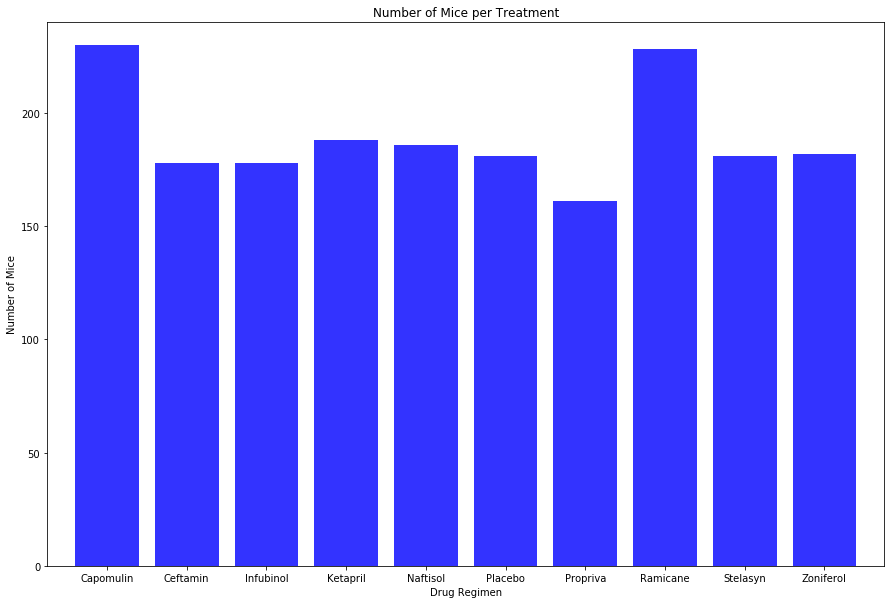

In [151]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using PyPlot.

x_axis = np.arange(len(mice_list))
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.bar(x_axis, mice_list, color="b", alpha=0.8, align="center")

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

plt.xlim(-0.75, len(mice_list)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.savefig("../../Images/PyPlot_mice_per_treat.png")

In [152]:
# Group by gender and get the numbers to plot
groupby_gender = Combined_data.groupby(["Mouse ID", "Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# Create and Format the Percentage of Female vs Male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# Format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# Gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


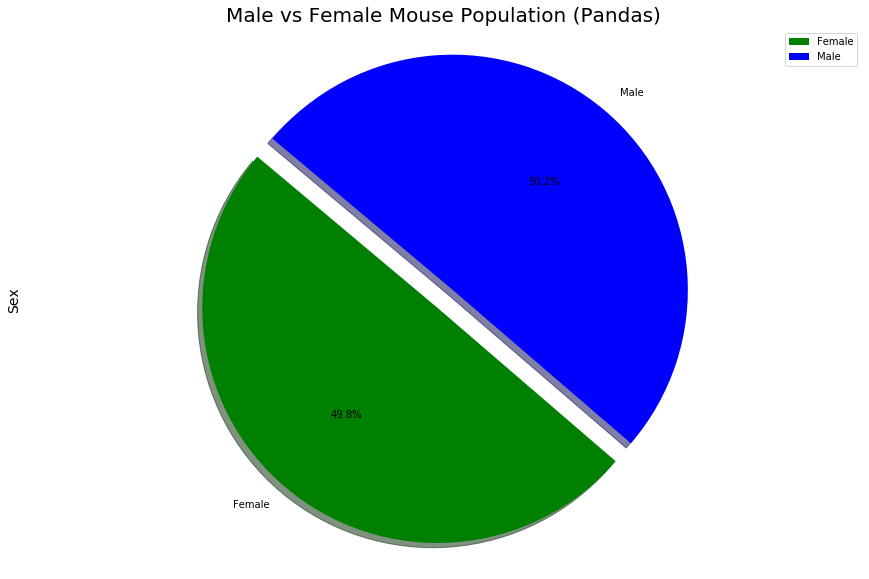

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colors = ["green", "blue"]
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y="Total Count",figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title("Male vs Female Mouse Population (Pandas)",fontsize = 20)
plt.ylabel("Sex",fontsize = 14)
plt.axis("equal",fontsize = 14)

plt.savefig("../../Images/Pi_Pandas.png", bbox_inches = "tight")
plt.show()

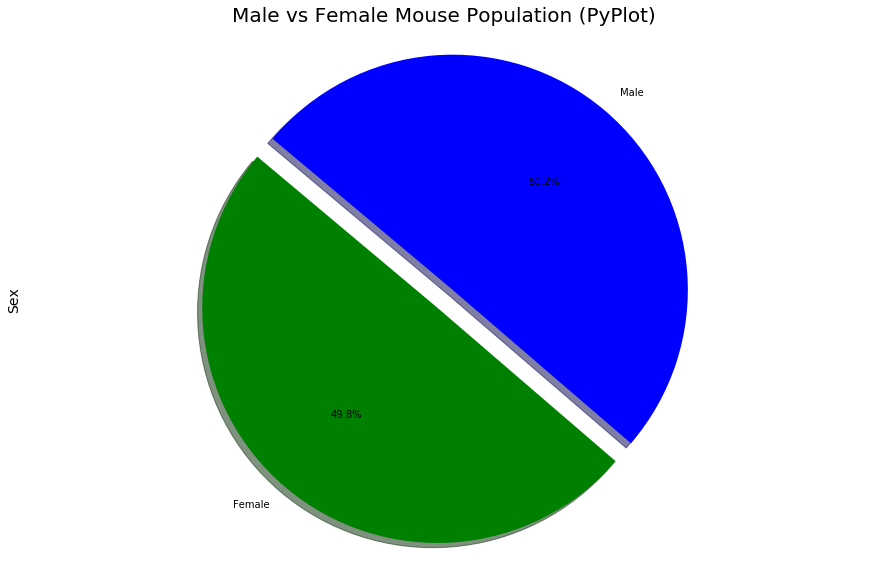

In [157]:
# Generate a pie plot showing the distribution of female versus male mice using PyPlot

# Create Labels for the sections of the Pie
labels = ["Female","Male"]

# List the values of each section of the pie chart
sizes = [49.799197,50.200803]

# Set colors for each section of the pie
colors = ["green", "blue"]

# Determine which section of the circle to detach
explode = (0.1, 0)

# Create the pie chart based upon the values
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title("Male vs Female Mouse Population (PyPlot)",fontsize= 20)
plt.ylabel("Sex",fontsize = 14)

# Set Equal Axis
plt.axis("equal",fontsize = 14)

plt.savefig("../../Images/Pi_Plot.png", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [159]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ramicane",:]
Infubinol_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ceftamin",:]

In [160]:
# Capomulin

Capomulin_last = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [161]:
# Create empty list to fill with tumor vol data (for plotting)

Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [162]:
# Ramicane

Ramicane_last = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")

In [163]:
# Create empty list to fill with tumor vol data (for plotting)

Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [164]:
# Infubinol

Infubinol_last = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [165]:
# Create empty list to fill with tumor vol data (for plotting)

Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [166]:
# Ceftamin

Ceftamin_last = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [167]:
# Create empty list to fill with tumor vol data (for plotting)

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


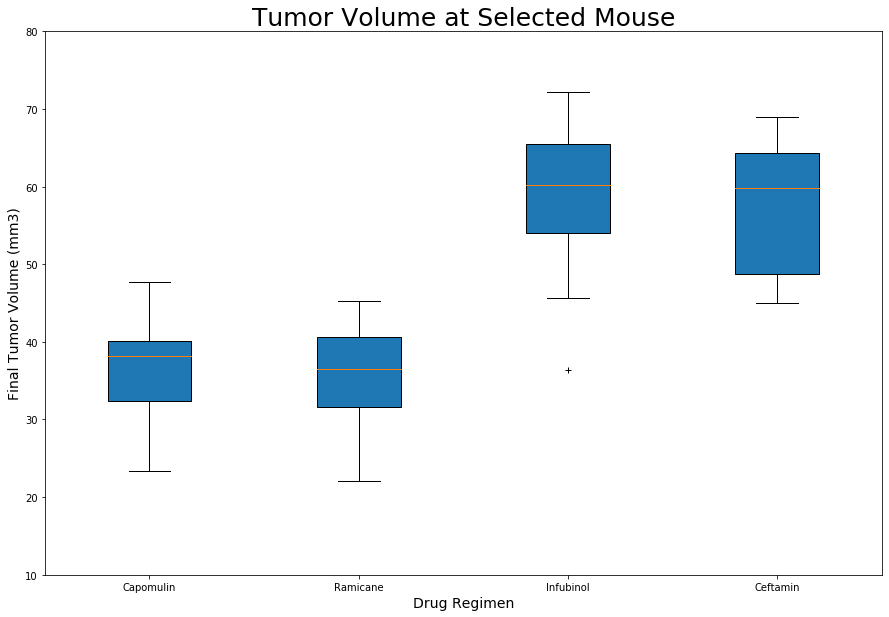

In [215]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set_title("Tumor Volume at Selected Mouse",fontsize = 25)
ax1.set_ylabel("Final Tumor Volume (mm3)",fontsize = 14)
ax1.set_xlabel("Drug Regimen",fontsize = 14)
bp = ax1.boxplot(data_to_plot, labels = Regimen, widths = 0.4, patch_artist = True, showfliers=True, vert = True)
plt.setp(bp['fliers'], color = 'red', marker = '+')

plt.ylim(10, 80)

plt.savefig("../../Images/box_plot.png", bbox_inches = "tight")

plt.show()

## Line and Scatter Plots

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


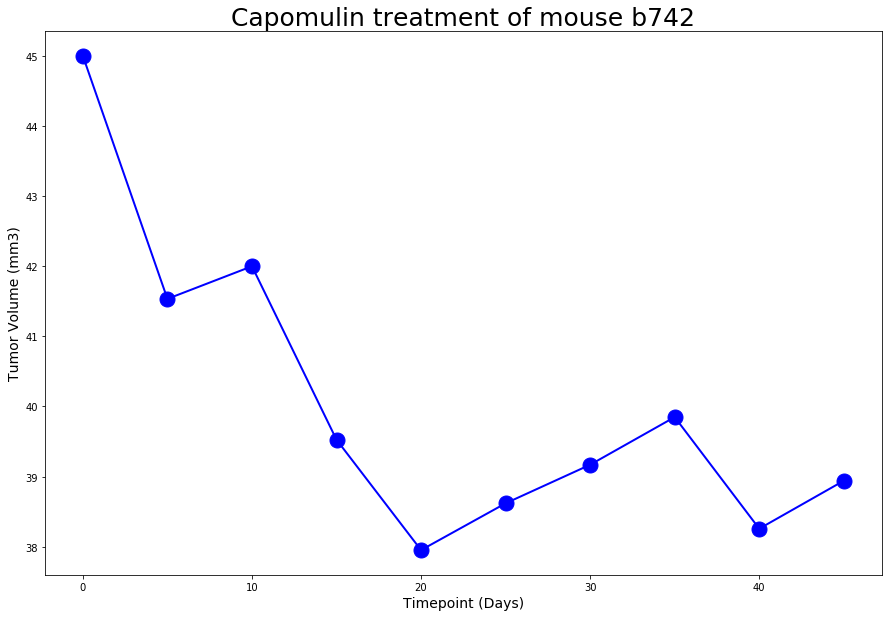

In [178]:
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15,10))
plt.title("Capomulin treatment of mouse b742",fontsize = 25)
plt.plot(x_axis, tumsiz,marker="o", markersize=15, color="blue", linewidth=2, label="Fahrenheit")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)

plt.savefig("../../Images/line_graph.png", bbox_inches = "tight")
plt.show()

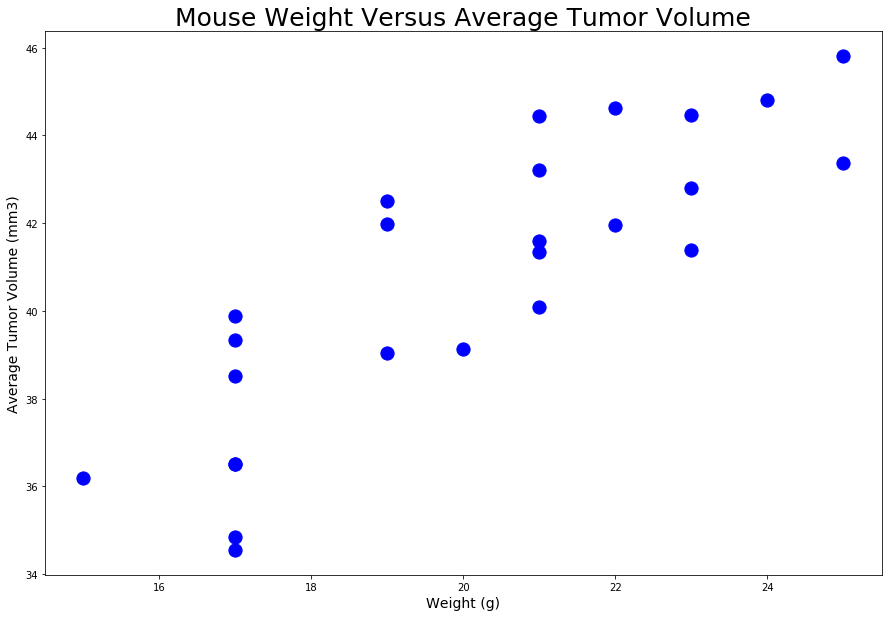

In [179]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15,10))
avg_capm_vol = Capomulin_df.groupby(["Mouse ID"]).mean()

marker_size = 15
plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],s=175, color="blue")
plt.title("Mouse Weight Versus Average Tumor Volume",fontsize=25)
plt.xlabel("Weight (g)",fontsize = 14)
plt.ylabel("Average Tumor Volume (mm3)",fontsize = 14)

plt.savefig("../../Images/scatterplot.png", bbox_inches = "tight")
plt.show()


## Correlation and Regression

In [180]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = round(st.pearsonr(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [183]:
# Slope

x_values = avg_capm_vol["Weight (g)"]
y_values = avg_capm_vol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient): {corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241047
intercept:21.55216053268501
rvalue (Correlation coefficient):0.841936342469472
pandas (Correlation coefficient): 0.84
stderr:0.1275435903320133
y = 0.95x + 21.55


The r-squared is: 0.7088568047708721


<function matplotlib.pyplot.show(*args, **kw)>

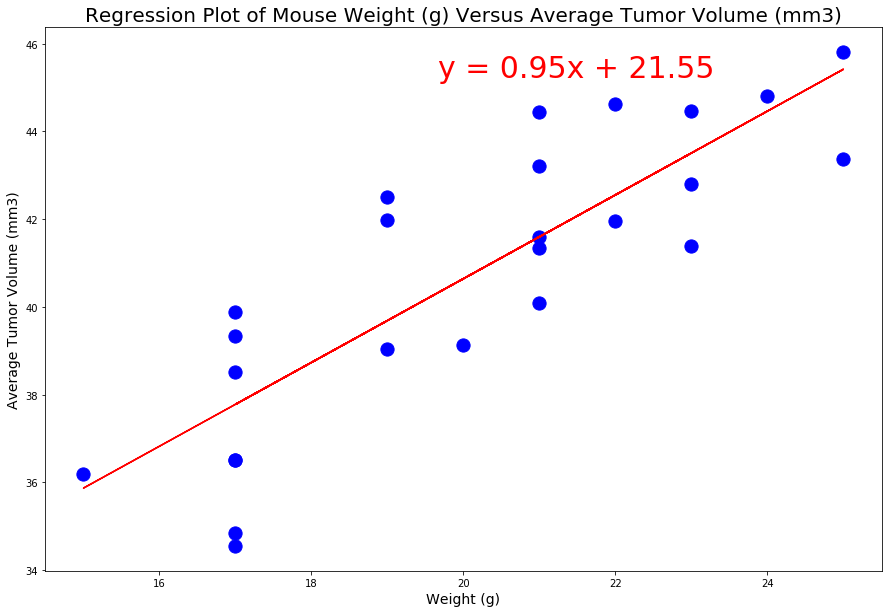

In [184]:
# Linear Regression equation and line to plot

fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Regression Plot of Mouse Weight (g) Versus Average Tumor Volume (mm3)",fontsize = 20)
plt.xlabel("Weight (g)",fontsize = 14)
plt.ylabel("Average Tumor Volume (mm3)",fontsize = 14)
ax1.annotate(line_eq, xy=(20, 40), xycoords="data", xytext=(0.8, 0.95), textcoords="axes fraction", horizontalalignment="right", verticalalignment="top", fontsize=30, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../../Images/linear_regression.png", bbox_inches = "tight")
plt.show